In [112]:
import pandas as pd
import numpy as np
import seaborn as sns

In [113]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [114]:
drop_col = ['RowNumber','CustomerId']
df=df.drop(drop_col,axis=1)


In [115]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='Geography', ylabel='HasCrCard'>

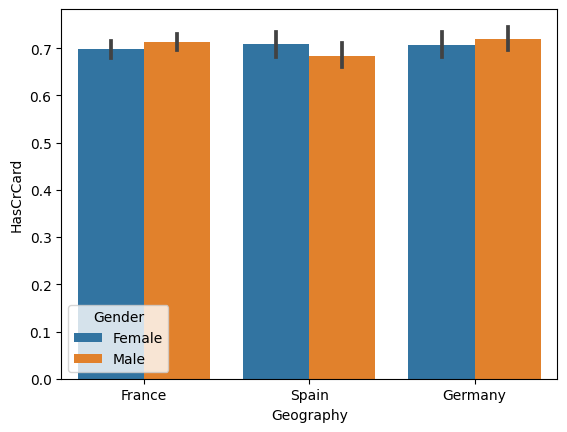

In [116]:
sns.barplot(x='Geography',y='HasCrCard',hue='Gender',data=df)

<AxesSubplot:xlabel='Geography', ylabel='Tenure'>

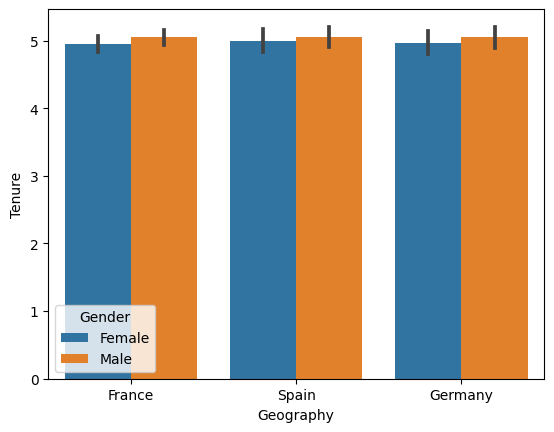

In [117]:
sns.barplot(x='Geography',y='Tenure',hue='Gender', data=df)

In [118]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [119]:
df.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [120]:
def classify_age(df):
    age_feat = [18,25,35,45,70,90,100,120]
    age_desc = ['young','adult','eldery','old','very old','ninties','hundreds']
    
    category = pd.cut(df.Age, age_feat, labels=age_desc)
    df['Age'] = category
    return df

def simplify_salaries(df):
    
    bins = (-1,10,50000,100000,150000,200000, 2500000)
    grp_name = ['Unknown','Min','1_quartile','2_quartile','3_quartile','Max']
    
    res = pd.cut(df.EstimatedSalary, bins, labels=grp_name)
    df.EstimatedSalary = res
    
    return df

def transform_features(df):
    
    df = classify_age(df)
    df = simplify_salaries(df)
    
    return df

df = transform_features(df)

df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,eldery,2,0.00,1,1,1,2_quartile,1
1,Hill,608,Spain,Female,eldery,1,83807.86,1,0,1,2_quartile,0
2,Onio,502,France,Female,eldery,8,159660.80,3,1,0,2_quartile,1
3,Boni,699,France,Female,eldery,1,0.00,2,0,0,1_quartile,0
4,Mitchell,850,Spain,Female,eldery,2,125510.82,1,1,1,1_quartile,0


In [121]:
df.Balance.describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64